In [26]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import matplotlib as plt

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['types', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# we want to answer the question: do customers, on average, take bikes for longer rides than subscribers?

# null hypothesis: the average trip duration of 'customers' is the same or shorter than the average trip duration of 'subscribers' with a significance level of alpha = 0.05

# alternative hypothesis: the average trip duration of 'customers' is greater than the average trip duration of 'subscribers' with a significance level of alpha = 0.05

In [27]:
!ls /gws/open/Student/citibike

201307-citibike-tripdata.zip  201508-citibike-tripdata.zip
201308-citibike-tripdata.zip  201509-citibike-tripdata.zip
201309-citibike-tripdata.zip  201510-citibike-tripdata.zip
201310-citibike-tripdata.zip  201511-citibike-tripdata.zip
201311-citibike-tripdata.zip  201512-citibike-tripdata.zip
201312-citibike-tripdata.zip  201601-citibike-tripdata.zip
201401-citibike-tripdata.zip  201602-citibike-tripdata.zip
201402-citibike-tripdata.zip  201603-citibike-tripdata.zip
201403-citibike-tripdata.zip  201604-citibike-tripdata.zip
201404-citibike-tripdata.zip  201605-citibike-tripdata.zip
201405-citibike-tripdata.zip  201606-citibike-tripdata.zip
201406-citibike-tripdata.zip  201607-citibike-tripdata.zip
201407-citibike-tripdata.zip  201608-citibike-tripdata.zip
201408-citibike-tripdata.zip  201609-citibike-tripdata.zip
201409-citibike-tripdata.zip  201610-citibike-tripdata.zip
201410-citibike-tripdata.zip  201611-citibike-tripdata.zip
201411-citibike-tripdata.zip  201612-citibike-tripdata.z

In [28]:
datestring = '201701'

In [29]:
df = pd.read_csv('/gws/open/Student/citibike/' + datestring + '-citibike-tripdata.csv.zip', compression='zip')

In [30]:
df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0


In [31]:
df.columns

Index([u'Trip Duration', u'Start Time', u'Stop Time', u'Start Station ID',
       u'Start Station Name', u'Start Station Latitude',
       u'Start Station Longitude', u'End Station ID', u'End Station Name',
       u'End Station Latitude', u'End Station Longitude', u'Bike ID',
       u'User Type', u'Birth Year', u'Gender'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726676 entries, 0 to 726675
Data columns (total 15 columns):
Trip Duration              726676 non-null int64
Start Time                 726676 non-null object
Stop Time                  726676 non-null object
Start Station ID           726676 non-null int64
Start Station Name         726676 non-null object
Start Station Latitude     726676 non-null float64
Start Station Longitude    726676 non-null float64
End Station ID             726676 non-null int64
End Station Name           726676 non-null object
End Station Latitude       726676 non-null float64
End Station Longitude      726676 non-null float64
Bike ID                    726676 non-null int64
User Type                  723483 non-null object
Birth Year                 697600 non-null float64
Gender                     726676 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 83.2+ MB


In [33]:
df2 = df.drop([u'Start Time', u'Stop Time', u'Start Station ID',
       u'Start Station Name', u'Start Station Latitude',
       u'Start Station Longitude', u'End Station ID', u'End Station Name',
       u'End Station Latitude', u'End Station Longitude', u'Bike ID',
       u'Birth Year', u'Gender'], axis=1)

In [34]:
df2.head()

,Trip Duration,User Type
0,680,Subscriber
1,1282,Subscriber
2,648,Customer
3,631,Customer
4,621,Customer


In [35]:
df3 = df2.dropna(how = 'any')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723483 entries, 0 to 726675
Data columns (total 2 columns):
Trip Duration    723483 non-null int64
User Type        723483 non-null object
dtypes: int64(1), object(1)
memory usage: 16.6+ MB


In [36]:
df3['User Type'] = df3['User Type'].astype('category')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
#df3.plot.bar('User Type', 'Trip Duration')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723483 entries, 0 to 726675
Data columns (total 2 columns):
Trip Duration    723483 non-null int64
User Type        723483 non-null category
dtypes: category(1), int64(1)
memory usage: 11.7 MB


In [38]:
index_of_subscribers = [i for i,j in enumerate(df3['User Type']) if j == 'Subscriber']

In [39]:
subscriber_trip_durations = df3['Trip Duration'][index_of_subscribers]

In [40]:
index_of_customers = [i for i,j in enumerate(df3['User Type']) if j == 'Customer']

In [41]:
customer_trip_durations = df3['Trip Duration'][index_of_customers]

In [42]:
means = [np.mean(subscriber_trip_durations), np.mean(customer_trip_durations)]
names = ['Subscriber', 'Customer']
types = [1, 2]

In [43]:
df4 = pd.DataFrame(means,names)
df4.columns = ['means']
df4

,means
Subscriber,769.908443
Customer,960.451832


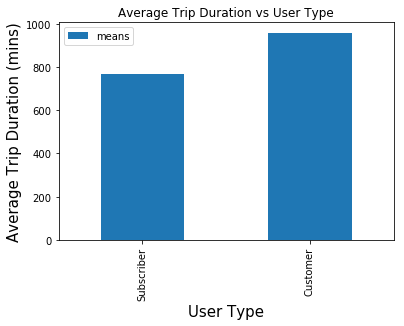

In [44]:
df4.plot.bar()
plt.title('Average Trip Duration vs User Type')
plt.xlabel('User Type', fontsize = 15)
plt.ylabel('Average Trip Duration (mins)', fontsize = 15)